### Importing and Reading Data

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder

In [79]:
df=pd.read_csv("Occupancy_Estimation.csv")
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


### Column Categorization

In [80]:
num_cols = ['S1_Temp','S2_Temp','S3_Temp','S4_Temp','S1_Light','S2_Light','S3_Light','S4_Light','S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2','S5_CO2_Slope']
cat_cols = ['S6_PIR','S7_PIR','Room_Occupancy_Count'] 

### Basic Checks

### Exploratory Data Analysis

In [81]:
df.shape

(10129, 19)

### Basic Structure Info

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

### Data Types of Columns

In [83]:
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

### Handling missing values

In [84]:
# Check missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Option: fill numeric NaNs with column median
df.fillna(df.median(numeric_only=True), inplace=True)

Missing values:
 Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


In [85]:
df.duplicated().sum()

0

In [86]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


### Statistical Summary

In [87]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


### Unique Values in Each Column

In [88]:
df.nunique()

Date                        7
Time                    10129
S1_Temp                    24
S2_Temp                    69
S3_Temp                    29
S4_Temp                    27
S1_Light                   68
S2_Light                   82
S3_Light                  177
S4_Light                   75
S1_Sound                  231
S2_Sound                  185
S3_Sound                  258
S4_Sound                  106
S5_CO2                    186
S5_CO2_Slope             1579
S6_PIR                      2
S7_PIR                      2
Room_Occupancy_Count        4
dtype: int64

### Seasonality Check

In [89]:
df['Date'].unique()

array(['2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2018/01/10', '2018/01/11'], dtype=object)

### Data Aggregation and Trend Plot

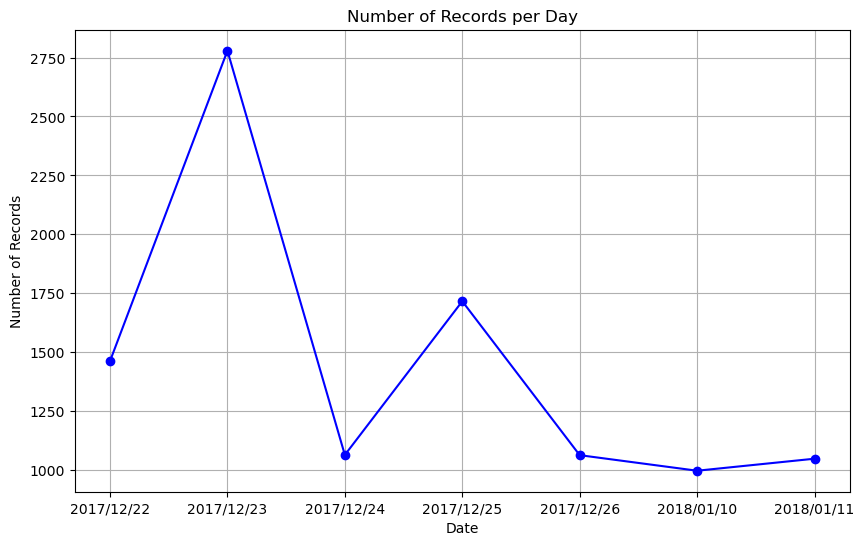

In [90]:
# Group by date and count the number of records for each day
daily_counts = df.groupby('Date').size().reset_index(name='count')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['Date'], daily_counts['count'], marker='o', linestyle='-', color='b')
plt.title('Number of Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

### DateTime Conversion + Time-of-Day Binning

In [109]:
df['Date_time'] = pd.to_datetime(df['Date'] +' '+ df['Time'])
dt_time = df.pop('Date_time')
df.insert(2, 'Date_time', dt_time)

df['Hours'] = df['Date_time'].dt.hour
df['Time_of_Day'] = pd.cut(df['Hours'], bins = [0,6,12,17,22,24], labels = ['Night','Morning','Afternoon','Evening','Night'], include_lowest=True, ordered = False)

df.pop('Hours')
day_time = df.pop('Time_of_Day')
df.insert(2, 'Time_of_Day', day_time)
df.head()

,Date,Time,Time_of_Day,Date_time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,...,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,Morning,2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,...,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,Morning,2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,...,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,Morning,2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,...,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,Morning,2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,...,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,Morning,2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,...,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


### Time-of-Day Occupancy Count Plot
Visualizes how occupancy varies across daily segments.

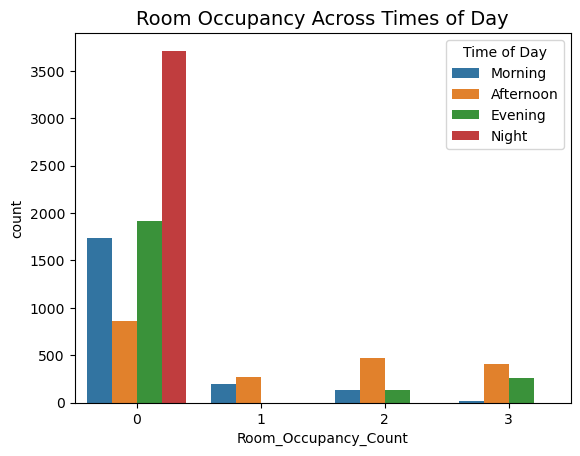

In [92]:
sns.countplot(data=df, 
              x='Room_Occupancy_Count', 
              hue='Time_of_Day', 
              hue_order=['Morning', 'Afternoon', 'Evening', 'Night'])  
plt.title('Room Occupancy Across Times of Day', fontsize=14)
plt.legend(title='Time of Day')  
plt.show()

Insights:

Which time of day has the highest occupancy.

Are certain times of day more likely to have low or high room usage?

Any unusual patterns — like rooms being busiest late at night or underused during the afternoon.

### Pie Chart of Average Occupancy by Time-of-Day


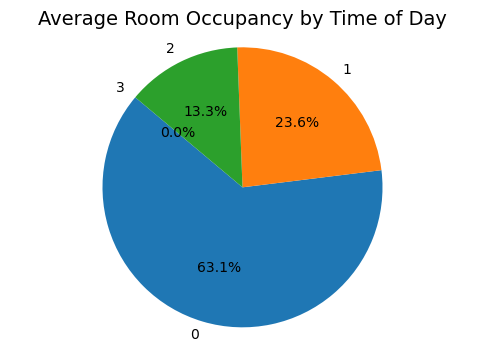

In [93]:
plt.figure(figsize=(6, 4))
plt.pie(
    
    avg_by_time,
    labels=avg_by_time.index,
    autopct='%.1f%%',
    startangle=140
)

# Styling
plt.title('Average Room Occupancy by Time of Day', fontsize=14)
plt.axis('equal')  # Keeps pie chart perfectly circular
plt.show()


The Chart says:

The largest slice indicates the time of day with the highest average occupancy — essentially, the busiest time.

Smaller slices reveal quieter periods or lower occupancy averages.

In [107]:
# average occupancy per time slot per date
avg_occupancy = df.groupby(['Date', 'Time_of_Day'])['Room_Occupancy_Count'].mean().reset_index().copy()

# Optional: Sort by date for cleaner view
avg_occupancy['Date'] = pd.to_datetime(avg_occupancy['Date'])
avg_occupancy.sort_values(by='Date', inplace=True)

# View result
print(avg_occupancy)


         Date  Time_of_Day  Room_Occupancy_Count
0  2017-12-22            0              1.585409
1  2017-12-22            1              0.950704
2  2017-12-22            2              1.745370
3  2017-12-22            3              0.000000
4  2017-12-23            0              1.336222
5  2017-12-23            1              0.882556
6  2017-12-23            2              0.227338
7  2017-12-23            3              0.000000
8  2017-12-24            2              0.000000
9  2017-12-24            3              0.000000
13 2017-12-25            3              0.000000
12 2017-12-25            2              0.000000
10 2017-12-25            0              0.000000
11 2017-12-25            1              0.000000
14 2017-12-26            2              0.000000
15 2017-12-26            3              0.000000
16 2018-01-10            0              2.638796
17 2018-01-10            1              0.000000
18 2018-01-10            3              0.000000
19 2018-01-11       

### Scatterplot (Light vs Sound) with Occupancy Hue
Checks correlation and clustering between sensory inputs and occupancy levels.

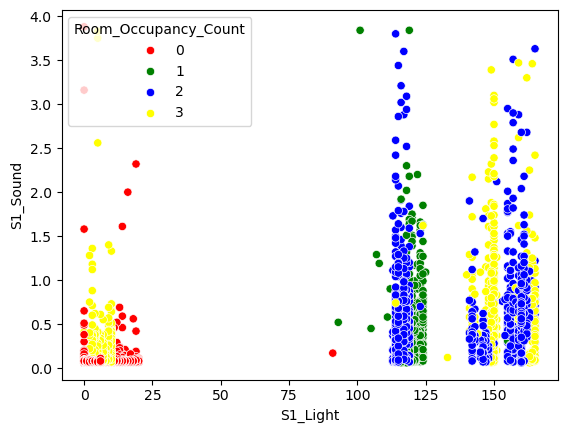

In [95]:
sns.scatterplot(data = df, x = 'S1_Light', y = 'S1_Sound', hue = 'Room_Occupancy_Count', palette = ['Red','Green','Blue','Yellow'])
plt.show()

### Boxplot showing range and outliers for each numerical column
Highlights variance and potential sensor outliers.

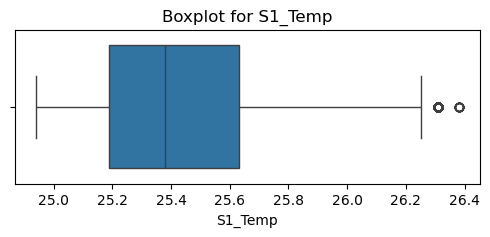

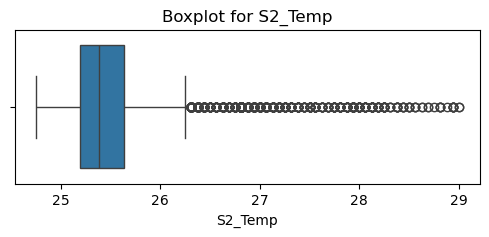

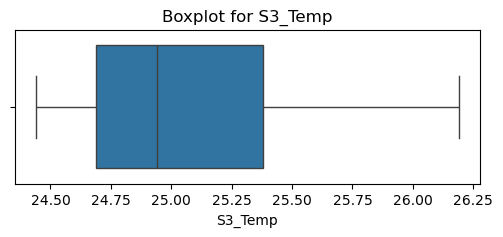

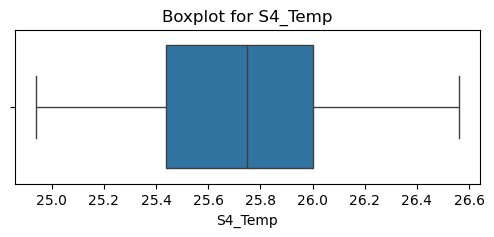

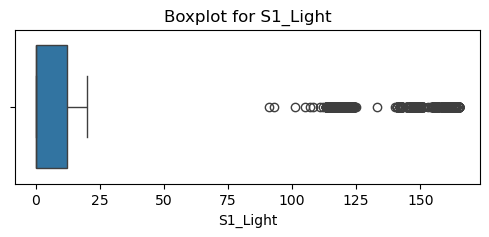

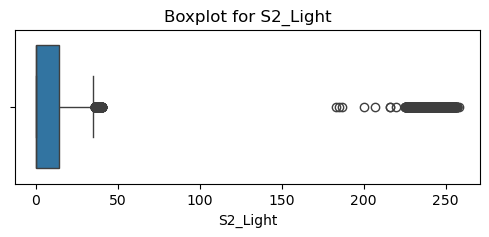

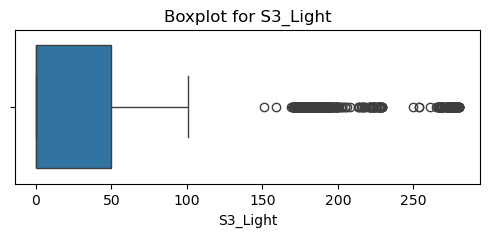

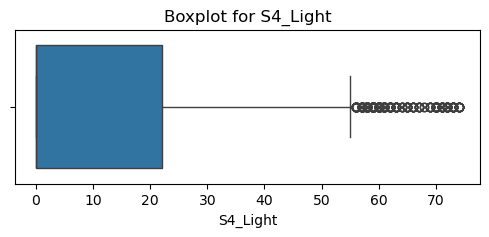

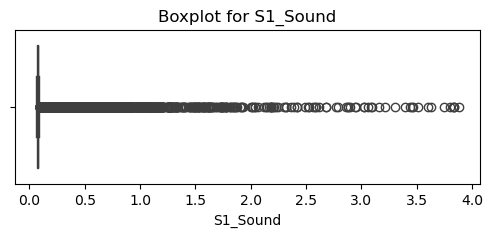

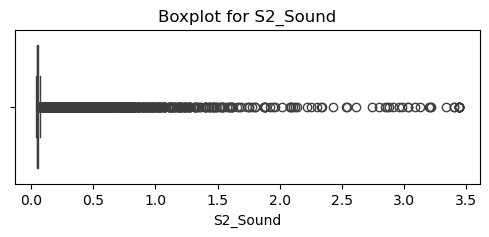

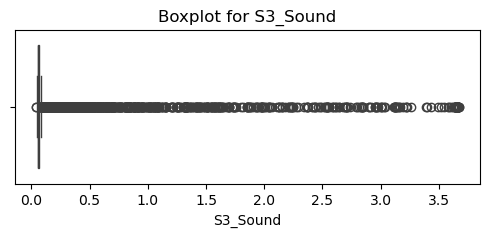

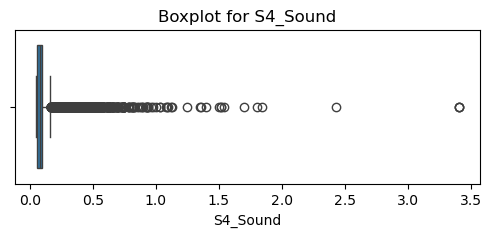

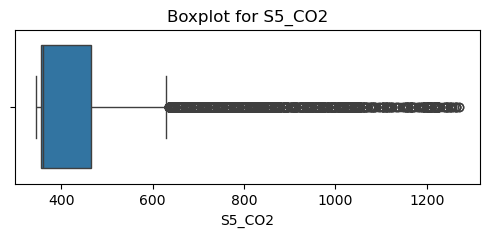

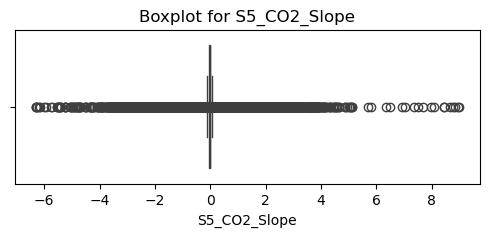

In [96]:
for i in num_cols:
  plt.figure(figsize=(6,2))
  sns.boxplot(data = df, x = i)
  plt.title('Boxplot for {}'.format(i))

Outlier detection: we can see extreme values as dots far from the box.

Visualizing data distribution: It reveals how spread out or skewed each feature is.

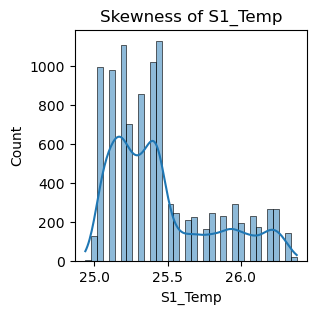

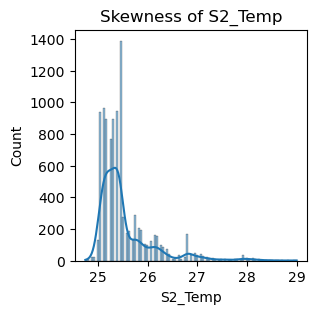

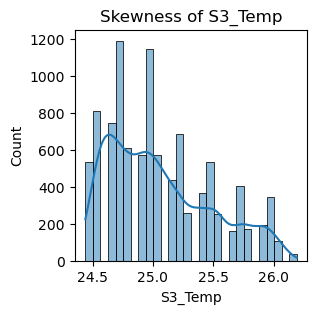

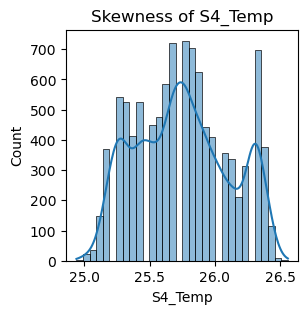

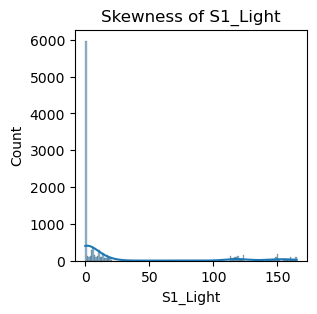

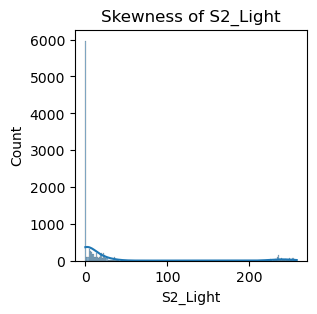

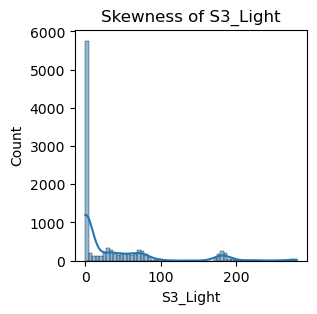

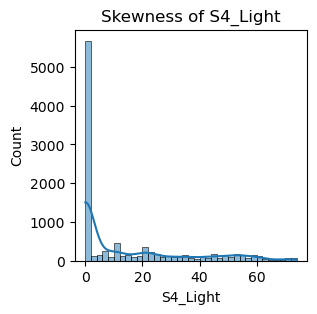

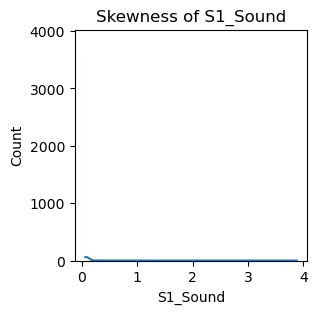

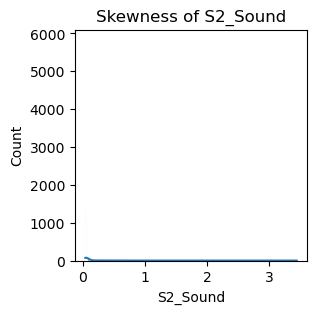

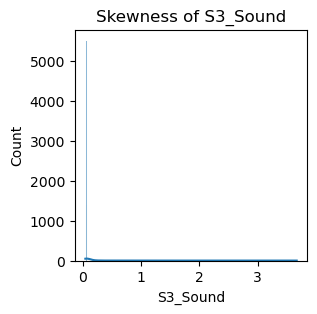

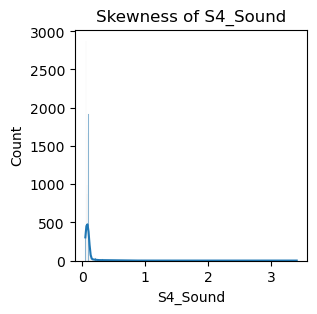

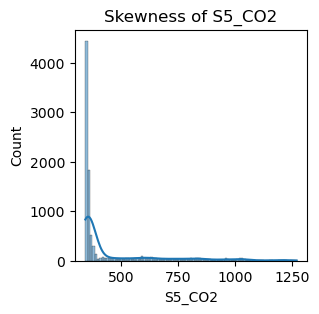

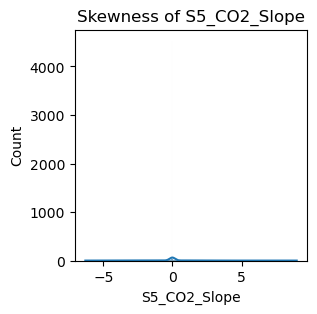

In [97]:
# skewness check
for col in num_cols:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Skewness of {col}')
    plt.show()


Points roughly forming a straight line: not skewed.

Curving away from the line: skewed data.

In [98]:
df[num_cols].skew()


S1_Temp          0.953613
S2_Temp          2.355681
S3_Temp          0.650162
S4_Temp          0.129630
S1_Light         1.820428
S2_Light         2.827817
S3_Light         2.100069
S4_Light         1.357618
S1_Sound         5.450448
S2_Sound         6.881610
S3_Sound         5.994767
S4_Sound        10.952134
S5_CO2           1.975692
S5_CO2_Slope     0.287967
dtype: float64

Positive values means right skewed.

### Correlation between numerical features
Assesses how sensor readings are interrelated.

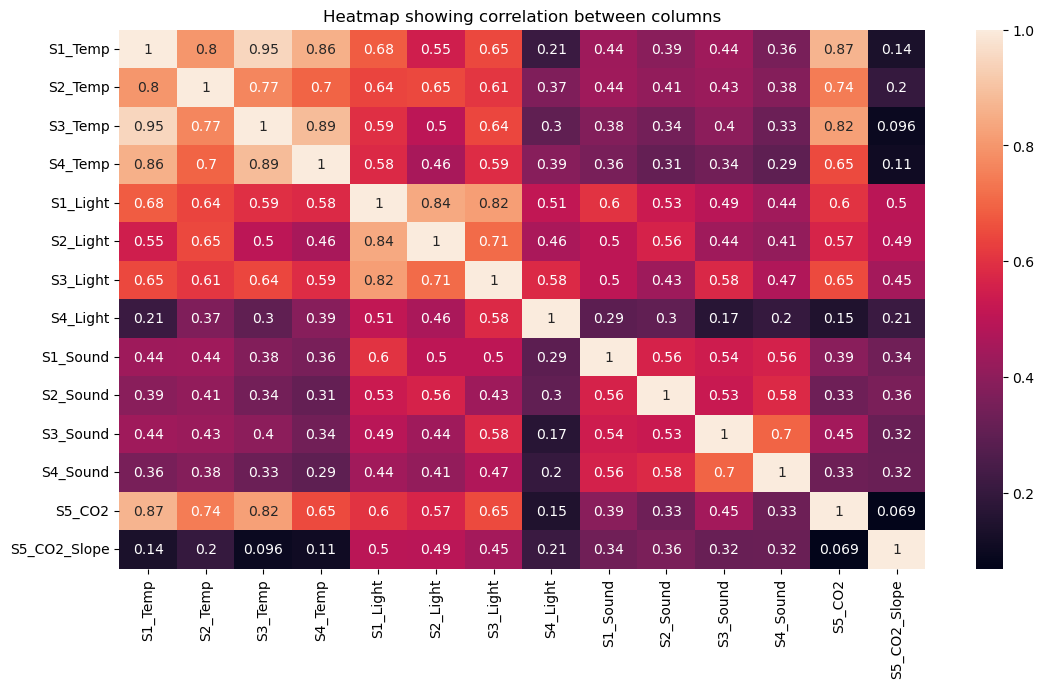

In [99]:
plt.figure(figsize=(13,7))
sns.heatmap(df[num_cols].corr(),annot = True)
plt.title('Heatmap showing correlation between columns')
plt.show()

In this color-coded grid where:

Darker shades represent stronger correlations

Diagonal always shows 1.00 (since each column is perfectly correlated with itself)

Off-diagonal values reveal the relationships between different columns

### Count of Room Occupancy


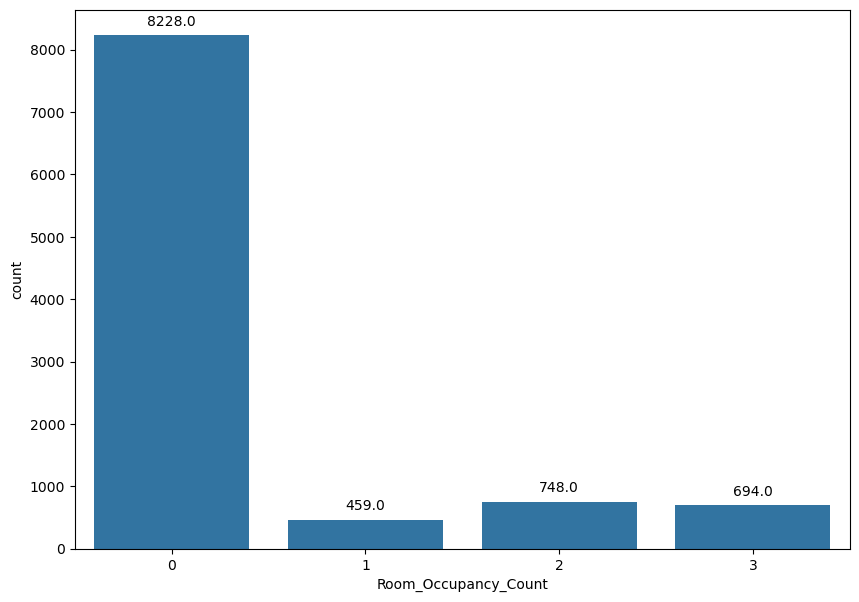

In [100]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data = df,x = 'Room_Occupancy_Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In this bar chart:

X-axis showing each possible number of occupants.

Y-axis showing how often that number appeared.

Numeric labels on top of each bar indicating the count.

### Class Distribution Pie Chart

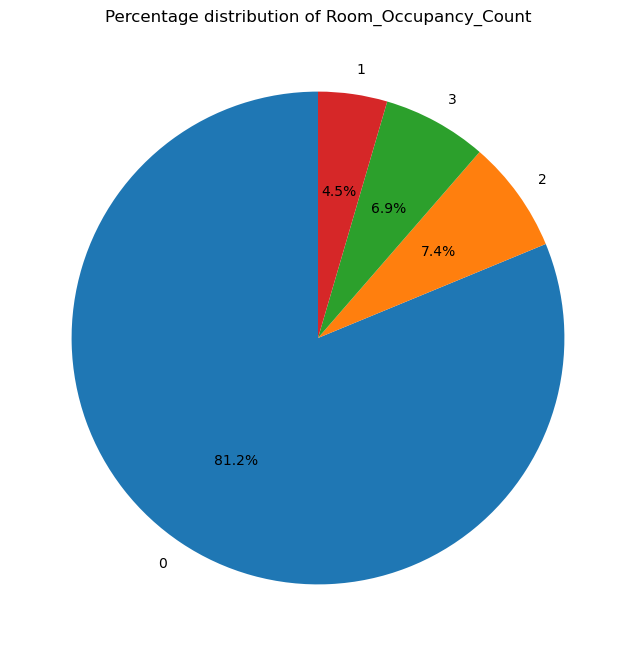

In [101]:
value_counts = df['Room_Occupancy_Count'].value_counts()

percentages = (value_counts / value_counts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of Room_Occupancy_Count')
plt.show()

A pie chart where:

Each slice represents a unique room occupancy count (e.g., 0, 1, 2…)

Sizes are proportional to how often that count appears in your dataset

Labels show both the value and its percentage of the total

Which occupancy values are most common—larger slices mean more frequent use.

The proportion each value contributes to total room usage.


### Data preprocessing and Label Encoding
Converts time-of-day into integers for model input.

In [102]:
label_encoder = LabelEncoder()
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])

### Removing columns with high correlation and also removing redundant columns


In [103]:
df1 = df.copy()

In [104]:
df1.drop(columns=['Date','Time','Date_time','S1_Temp','S3_Temp'],axis=1,inplace=True)

In [105]:
df1.head()

,Time_of_Day,S2_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2,24.75,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2,24.75,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2,24.75,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2,24.75,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2,24.75,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
